In [6]:
## are students addicted to alchohol in univ?
## Let's predict

In [8]:
import tensorflow as tf

In [11]:
a = tf.random.uniform([1])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-17ac39ce462e>", line 1, in <module>
    a = tf.random.uniform([1])
AttributeError: module 'tensorflow' has no attribute 'random'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2039, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\krish\Anac

AttributeError: module 'tensorflow' has no attribute 'random'

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import floor, ceil
from pylab import rcParams

%matplotlib inline

In [8]:
sns.set(style='ticks', palette='Spectral', font_scale=1.5)
material_palette = ["#4CAF50", "#2196F3", "#9E9E9E", "#FF9800", "#607D8B", "#9C27B0"]
sns.set_palette(material_palette)
rcParams['figure.figsize'] = 16, 8

plt.xkcd();
random_state = 42
np.random.seed(random_state)

In [40]:
#tf.set_random_seed(random_state)
#tf.random.set_seed()
tf.random.set_seed(1234)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-f99cebed13e1>", line 3, in <module>
    tf.random.set_seed(1234)
AttributeError: module 'tensorflow' has no attribute 'random'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2039, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\krish\Anacond

AttributeError: module 'tensorflow' has no attribute 'random'

In [14]:
##preparing the data
math_df = pd.read_csv("C:/data/student-mat.csv", sep=",")
port_df = pd.read_csv("C:/data/student-por.csv", sep=",")

math_df["course"] = "math"
port_df["course"] = "portuguese"

merged_df = math_df.append(port_df)
merged_df.shape

(1044, 34)

In [15]:
merge_vector = ["school","sex","age","address",
                "famsize","Pstatus","Medu","Fedu",
                "Mjob","Fjob","reason","nursery","internet"]

duplicated_mask = merged_df.duplicated(keep=False, subset=merge_vector)
duplicated_df = merged_df[duplicated_mask]
unique_df = merged_df[~duplicated_mask]
both_courses_mask = duplicated_df.duplicated(subset=merge_vector)
both_courses_df = duplicated_df[~both_courses_mask].copy()
both_courses_df["course"] = "both"
students_df = unique_df.append(both_courses_df)

In [16]:
students_df = students_df.sample(frac=1)
students_df['alcohol'] = (students_df.Walc * 2 + students_df.Dalc * 5) / 7
students_df['alcohol'] = students_df.alcohol.map(lambda x: ceil(x))
students_df['drinker'] = students_df.alcohol.map(lambda x: "yes" if x > 2 else "no")

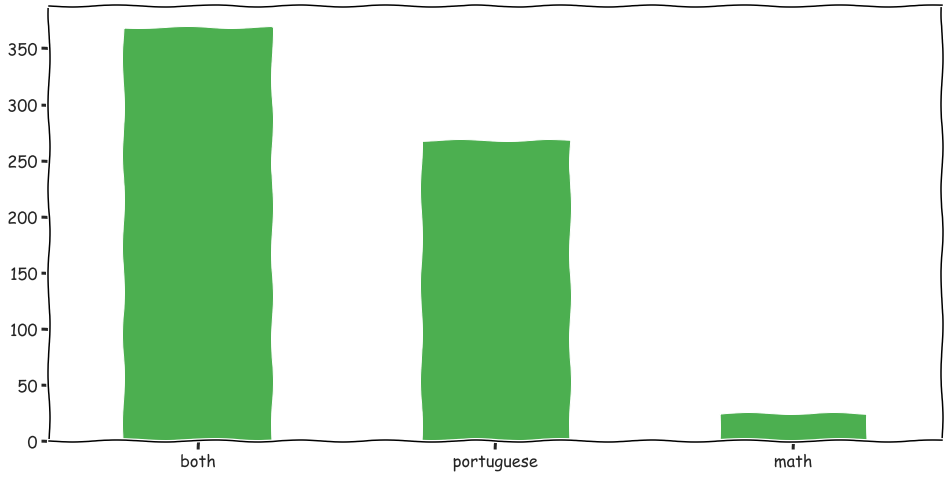

In [17]:
students_df.course.value_counts().plot(kind="bar", rot=0);

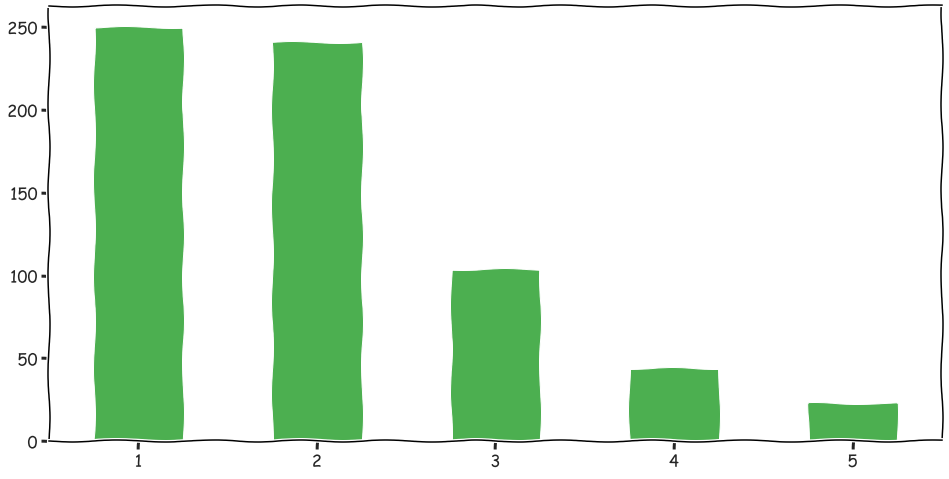

In [18]:
students_df.alcohol.value_counts().plot(kind="bar", rot=0);

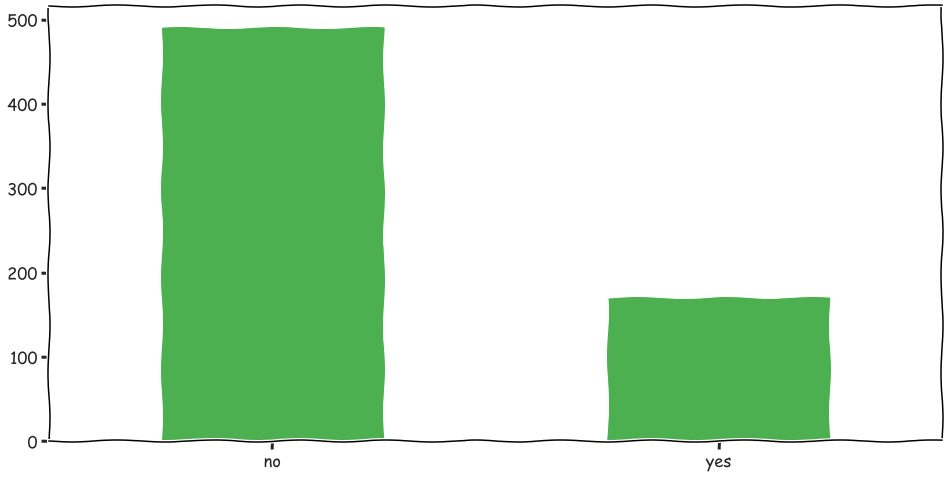

In [19]:
students_df.drinker.value_counts().plot(kind="bar", rot=0);

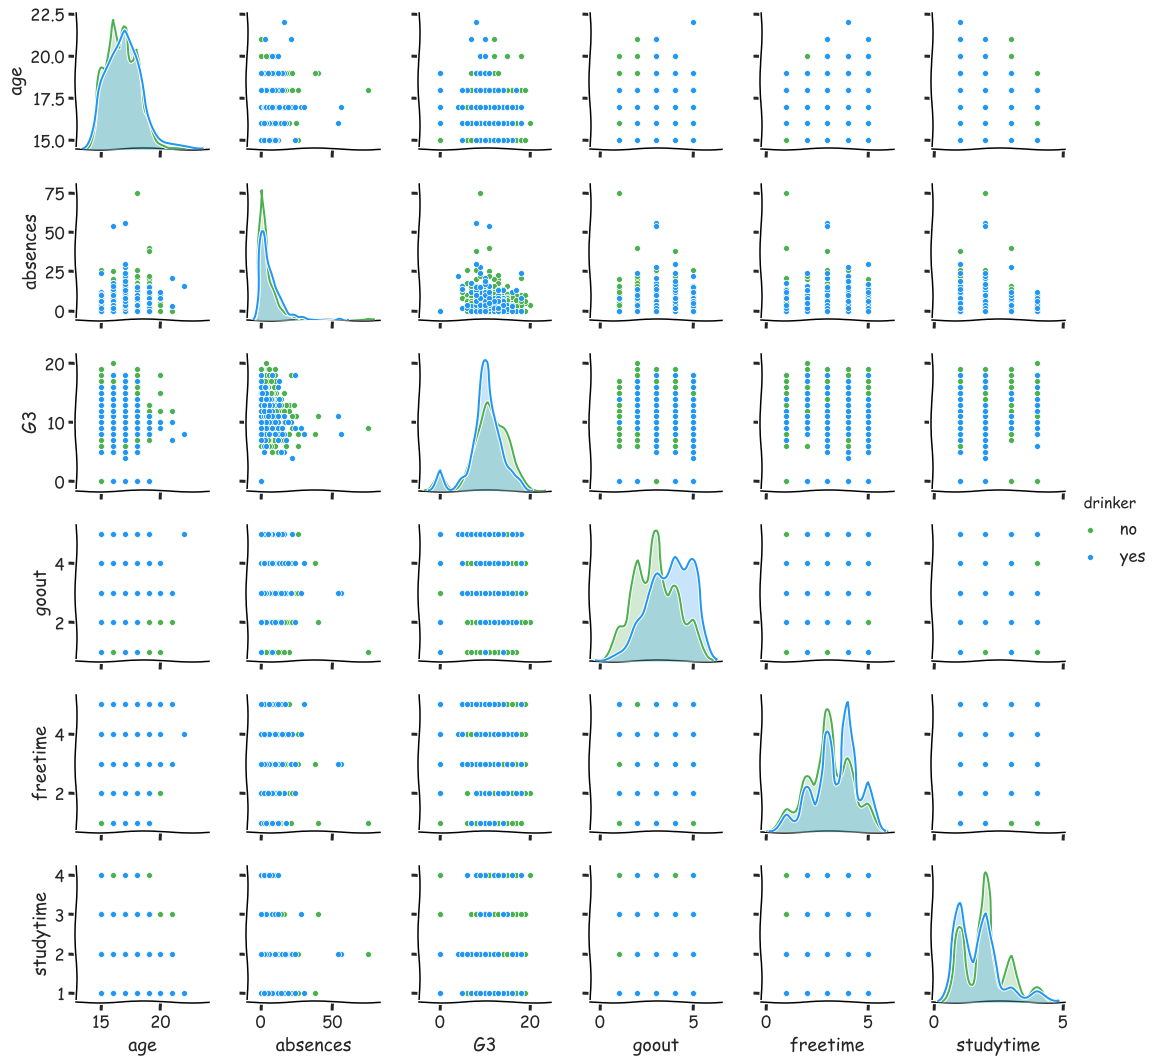

In [20]:
sns.pairplot(students_df[['age', 'absences', 'G3', 'goout', 'freetime', 'studytime', 'drinker']], hue='drinker');

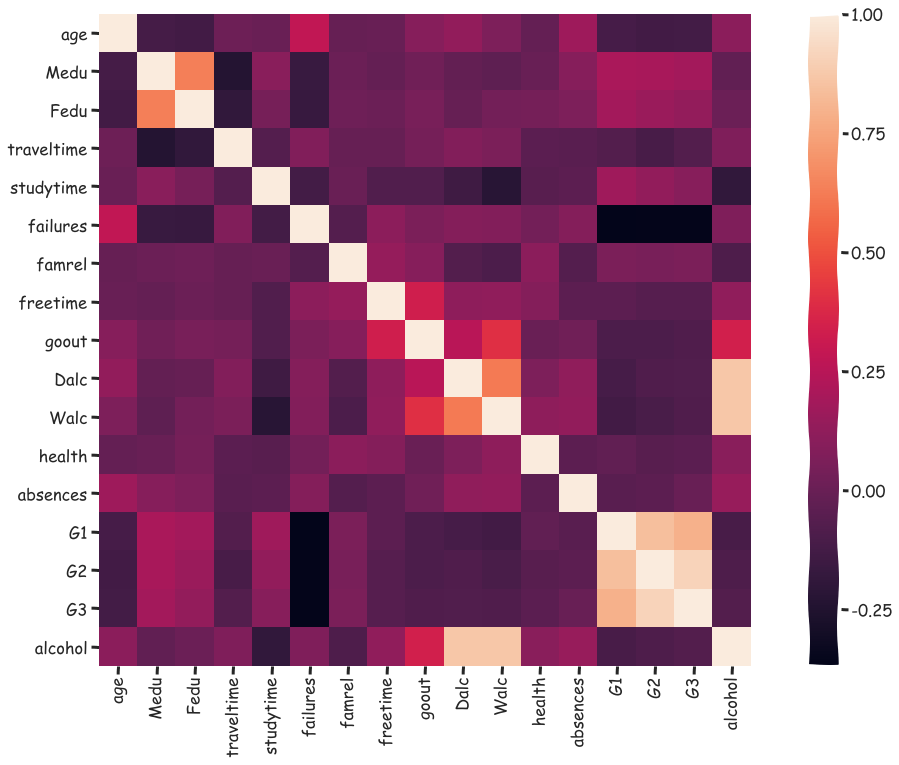

In [21]:
corr_mat = students_df.corr() 
fig, ax = plt.subplots(figsize=(20, 12)) 
sns.heatmap(corr_mat, vmax=1.0, square=True, ax=ax);

In [22]:
def encode(series): 
  return pd.get_dummies(series.astype(str))

In [23]:
train_x = pd.get_dummies(students_df.school)
train_x['age'] = students_df.age
train_x['absences'] = students_df.absences
train_x['g1'] = students_df.G1
train_x['g2'] = students_df.G2
train_x['g3'] = students_df.G3
train_x = pd.concat([train_x, encode(students_df.sex), encode(students_df.Pstatus), 
                     encode(students_df.Medu), encode(students_df.Fedu),
                     encode(students_df.guardian), encode(students_df.studytime),
                     encode(students_df.failures), encode(students_df.activities),
                     encode(students_df.higher), encode(students_df.romantic),
                     encode(students_df.reason), encode(students_df.paid),
                     encode(students_df.goout), encode(students_df.health),
                     encode(students_df.famsize), encode(students_df.course)
                    ], axis=1)

train_y = encode(students_df.drinker)

In [24]:
train_size = 0.9

train_cnt = floor(train_x.shape[0] * train_size)
x_train = train_x.iloc[0:train_cnt].values
y_train = train_y.iloc[0:train_cnt].values
x_test = train_x.iloc[train_cnt:].values
y_test = train_y.iloc[train_cnt:].values

In [ ]:
## our NN consists of input, output and 1 hidden layer
## We are using ReLU as activation function of the hidden layer
## and softmax for output layer
## As additional bonus we will use Dropout --simple way to reduce
## overfitting during the training of our network. 

In [25]:
def multilayer_perceptron(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

In [ ]:
## Lets set the number of neurons in the hidden layer to 38 and 
## and randomly initialize the weights and biases considering
## their proper dimensions:

In [28]:
n_hidden_1=38
n_input=train_x.shape[1]
n_classes=train_y.shape[1]
weights = {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

keep_prob = tf.placeholder("float")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-89fa5aef1a8e>", line 5, in <module>
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
AttributeError: module 'tensorflow' has no attribute 'Variable'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2039, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal im

AttributeError: module 'tensorflow' has no attribute 'Variable'

In [ ]:
## will train our model for 5000 epochs

In [29]:
training_epochs = 5000
display_step = 1000
batch_size = 32

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-6c6c284e2110>", line 5, in <module>
    x = tf.placeholder("float", [None, n_input])
AttributeError: module 'tensorflow' has no attribute 'placeholder'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2039, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  Fi

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [30]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-e4601f8c3c82>", line 1, in <module>
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
AttributeError: module 'tensorflow' has no attribute 'reduce_mean'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2039, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\krish\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow

AttributeError: module 'tensorflow' has no attribute 'reduce_mean'